## CamScanner Implementation using OpenCV along with compression

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline 

In [35]:
def show_img(img):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    fix_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    ax.imshow(fix_img)
    
    
def show_grey_img(img):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    fix_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ax.imshow(fix_img, cmap ="gray")

In [36]:
img = cv.imread("C:/Users/Jaysurya/Desktop/example_camscanner.PNG")

#### 1. Here's an example of what the ideal output of this project would be:

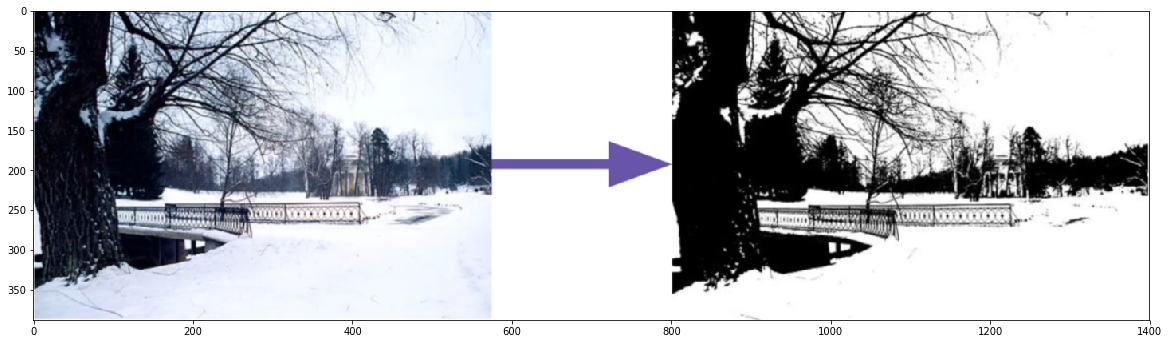

In [37]:
show_img(img)

### lets begin with a newspaper image

## -------------------------------------------------------------------------------------------------------------

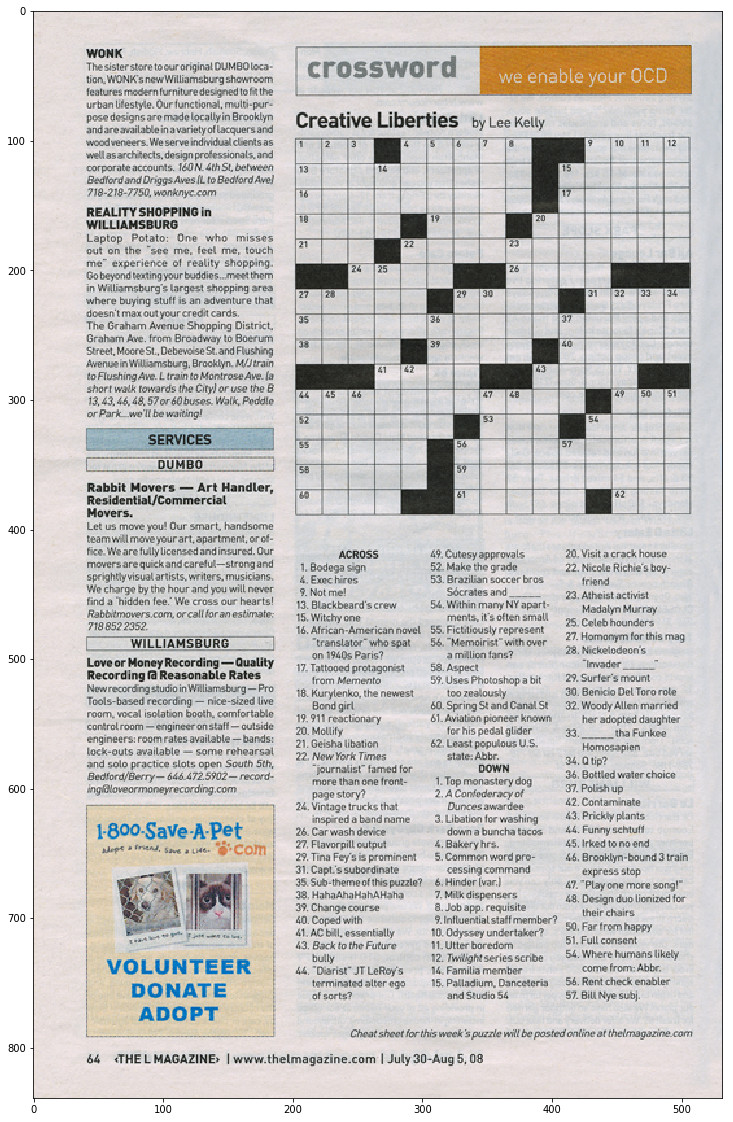

In [38]:
cross = cv.imread("DATA/crossword.jpg")
show_img(cross)

### image converted to a gray scale image

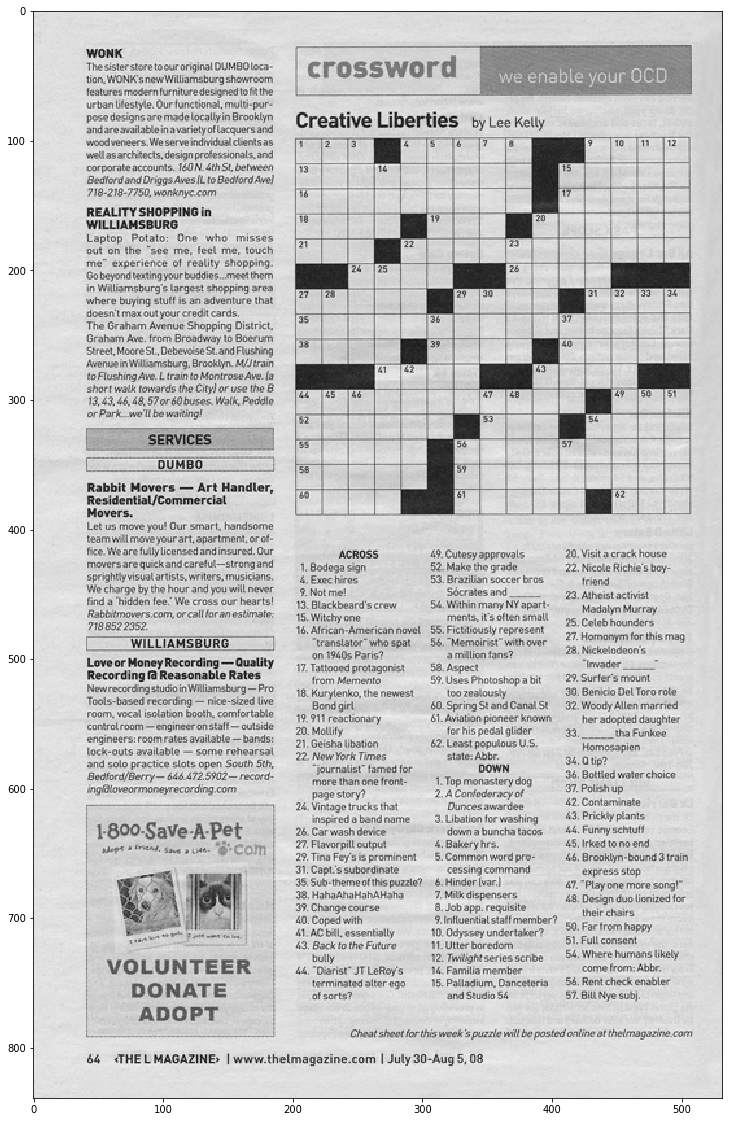

In [75]:
cross1 = cv.imread("DATA/crossword.jpg")
show_grey_img(cross1)

In [76]:
cross1.max()

255

In [77]:
cross1.mean()

194.6361628146648

In [78]:
return1, cross2 =cv.threshold(cross1, 165, 255, cv.THRESH_BINARY)

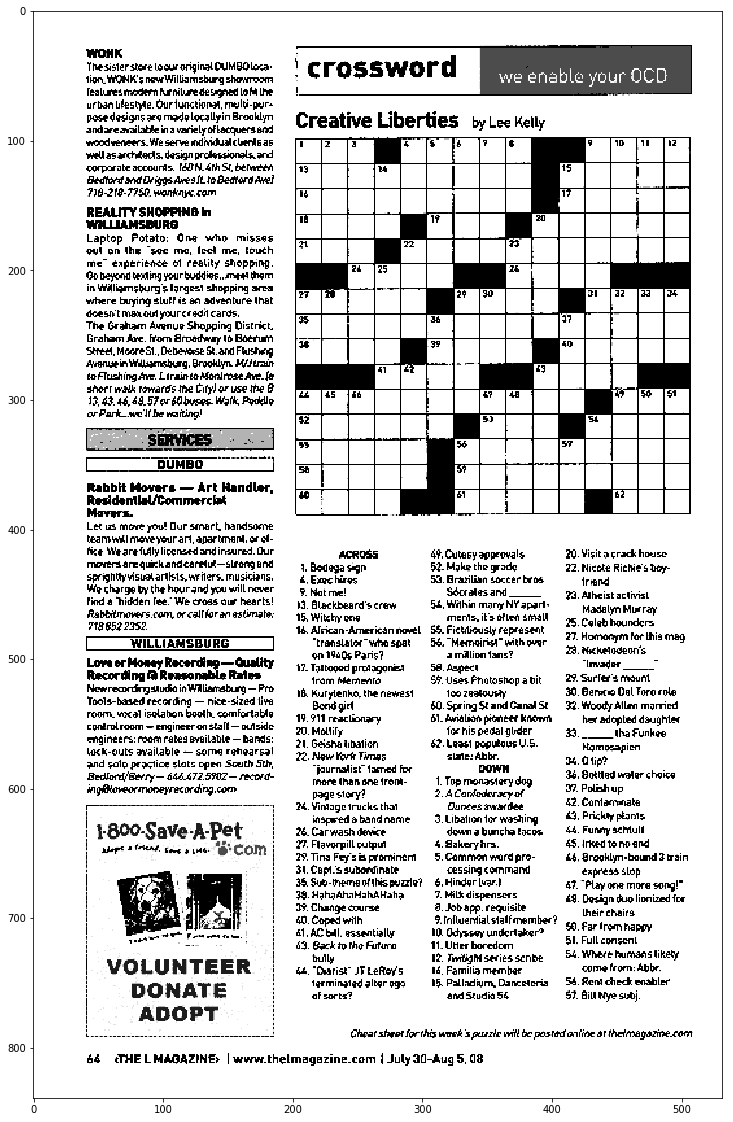

In [79]:
show_grey_img(cross2)

In [80]:
print(cross2.max()," , ", cross2.min())

255  ,  0


In [81]:
fix_img = cv.cvtColor(cross2, cv.COLOR_BGR2GRAY)
#img = plt.imshow(fix_img,cmap="gray")

In [82]:
cv.imwrite("scanned.jpg",cross2)

True

# Image copyright asignment using blending

In [47]:
img1 = cv.cvtColor(cv.imread("DATA/gorilla.jpg"), cv.COLOR_BGR2RGB)
img2 = cv.resize(cv.cvtColor(cv.imread("DATA/watermark_no_copy.png"), cv.COLOR_BGR2RGB),(600,600))

In [48]:
img1.shape

(1295, 1955, 3)

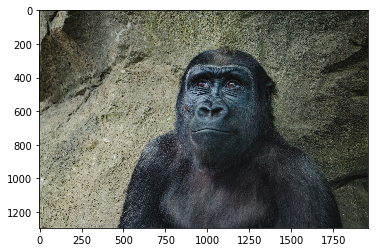

In [49]:
plt.imshow(img1)

In [50]:
x_offset = 1925 - 600
y_offset = 1295 - 600

In [51]:
img2.shape

(600, 600, 3)

In [52]:
rows, columns, channel = img2.shape

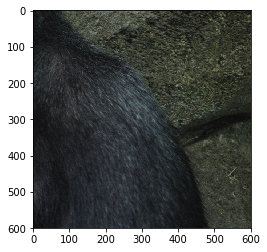

In [53]:
roi = img1[y_offset:1295,x_offset:1925]
plt.imshow(roi)

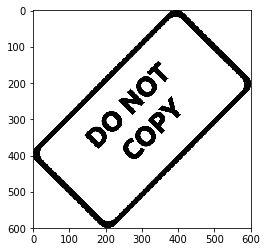

In [54]:
img2_gray = cv.cvtColor(img2,cv.COLOR_RGB2GRAY)
plt.imshow(img2_gray,cmap="gray")

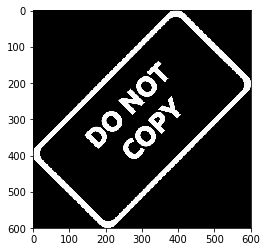

In [55]:
masked = cv.bitwise_not(img2_gray)
plt.imshow(masked,cmap="gray")

In [56]:
masked.shape

(600, 600)

In [57]:
white_back = np.full(img2.shape,255,dtype = np.uint8)# have a background for all 3 color channe;s
back_full = cv.bitwise_or(white_back,white_back,mask = masked) # place the masked image onto the white channel background

In [58]:
back_full.shape

(600, 600, 3)

In [59]:
white_back.shape

(600, 600, 3)

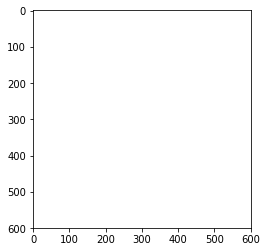

In [60]:
plt.imshow(white_back)

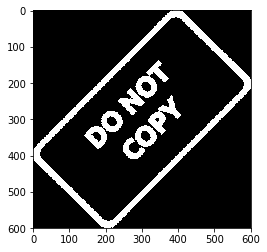

In [61]:
plt.imshow(back_full)

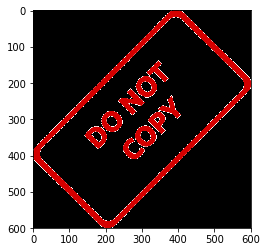

In [62]:
front = cv.bitwise_or(img2,img2,mask=masked)
plt.imshow(front)

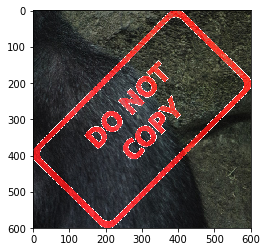

In [63]:
final_roi = cv.bitwise_or(roi,front)
plt.imshow(final_roi)

In [64]:
big_img = img1
small_img = final_roi

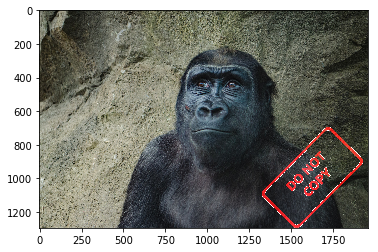

In [65]:
big_img[y_offset:y_offset+600,x_offset:x_offset+600] = small_img
plt.imshow(big_img)